In [2]:
import matplotlib.pyplot as plt
import mplhep
plt.style.use(mplhep.style.ATLAS)  # ATLAS/CMS/ALICE plot style
import numpy as np
import pandas as pd
import scipy.optimize as sc
import scipy.interpolate as interpol

In [3]:
# energy calibration
# get filepath of all calibration data
energy_path = 'Energy_Calibration/'

Na_file = energy_path + 'Na_22_Calibration_Spectrum_2.TKA'
N_Na = np.array(pd.read_csv(Na_file, header=None)[0][2:])
t_Na = 2701.071  # [s]

Co_file = energy_path + 'Co_60_Calibration_Spectrum_2.TKA'
N_Co = np.array(pd.read_csv(Co_file, header=None)[0][2:])
t_Co = 6666.116  # [s]

Pd_file = energy_path + 'Pd_106_Spectrum_1.TKA'
N_Pd = np.array(pd.read_csv(Pd_file, header=None)[0][2:])
t_Pd = pd.read_csv(Pd_file, header=None)[0][0]  # [s]

N_under = np.zeros((16382))  # empty array, later: underground
t_under = 10788  # has to be adjusted

In [4]:
def counting_rate(N, t):
    '''Calculate counting rate and uncertainty'''
    n = N / t
    u_n = np.sqrt(N) / t
    return n, u_n


def corrected_rate(N, t):
    '''Calculate counting rate corrected for underground with uncertainty'''
    n_raw, u_raw = counting_rate(N, t)
    n_under, u_under = counting_rate(N_under, t_under)

    n_corr = n_raw - n_under
    n_corr = np.where(n_corr>0, n_corr, 0)
    u_corr = np.sqrt(u_raw**2 + u_under**2)

    return n_corr, u_corr

In [5]:
n_Na, u_Na = corrected_rate(N_Na, t_Na)
n_Co, u_Co = corrected_rate(N_Co, t_Co)
n_Pd, u_Pd = corrected_rate(N_Pd, t_Pd)

In [6]:
def gauss(x, A, mu, sigma, B):
    return A * np.exp(-(x-mu)**2 / (2*sigma**2)) + B

def linear_fct(x, m, c):
    return m * x + c

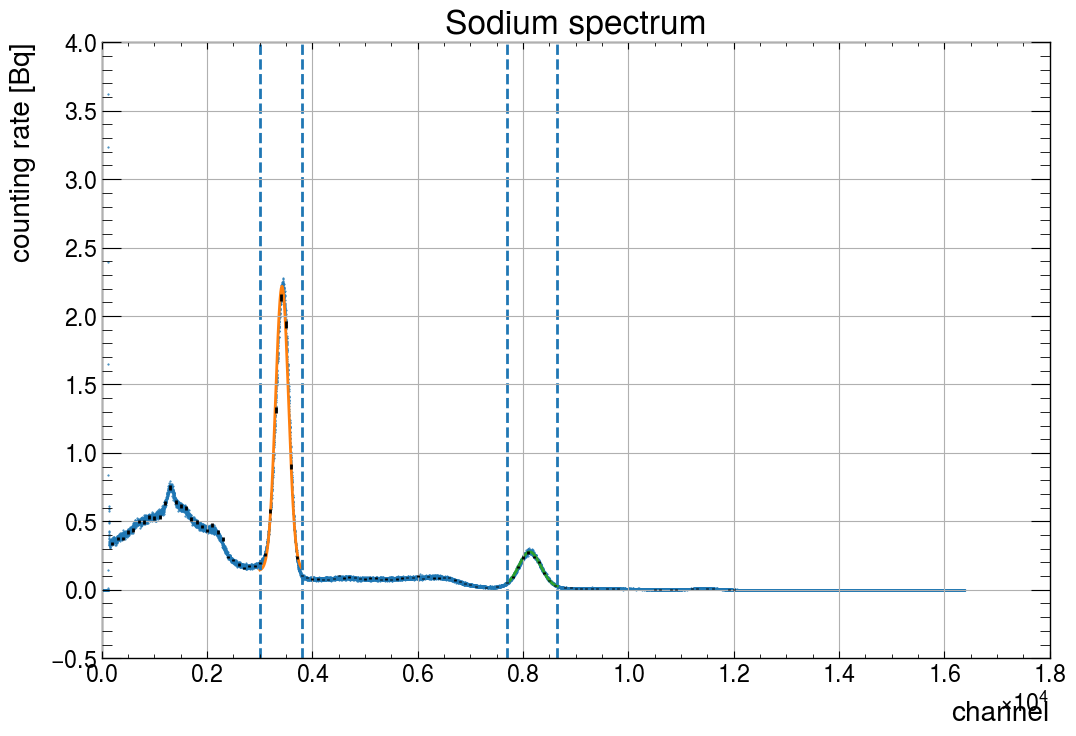

[2.07808002e+00 3.42250169e+03 1.22386638e+02 1.38943283e-01] [0.00211442 0.10912603 0.1301461  0.00073248]
[2.60646245e-01 8.12535069e+03 2.08949079e+02 1.63650800e-02] [7.37531741e-04 4.26170106e-01 8.67640260e-01 6.92403404e-04]


In [7]:
# Analysis of the sodium spectrum
channels = np.arange(1, len(N_Na)+1, 1)
a1, b1 = 3000, 3800
a2, b2 = 7700, 8650

coeffs_Na1, cov_Na1 = sc.curve_fit(gauss, channels[a1:b1], n_Na[a1:b1],
                                   sigma=u_Na[a1:b1], absolute_sigma=True,
                                   p0=(2, 3500, 120, 150))
coeffs_Na2, cov_Na2 = sc.curve_fit(gauss, channels[a2:b2], n_Na[a2:b2],
                                   sigma=u_Na[a2:b2], absolute_sigma=True,
                                   p0=(0.5, 8000, 200, 20))


fig, ax = plt.subplots(figsize=(12,8))

error_step = 100
ax.errorbar(channels[0:-1:error_step], n_Na[0:-1:error_step],
            yerr=u_Na[0:-1:error_step],
            fmt='none', c='black', zorder=10)

ax.plot(channels, n_Na, lw=0, marker = '.', ms = 1)
ax.plot(channels[a1:b1], gauss(channels[a1:b1], *coeffs_Na1))
ax.plot(channels[a2:b2], gauss(channels[a2:b2], *coeffs_Na2))
ax.axvline(channels[a1], ls = '--')
ax.axvline(channels[b1], ls = '--')
ax.axvline(channels[a2], ls = '--')
ax.axvline(channels[b2], ls = '--')

ax.set_title('Sodium spectrum')
ax.set_xlabel('channel')
ax.set_ylabel('counting rate [Bq]')

ax.grid()

plt.show()
print(coeffs_Na1, np.sqrt(np.diagonal(cov_Na1)))
print(coeffs_Na2, np.sqrt(np.diagonal(cov_Na2)))

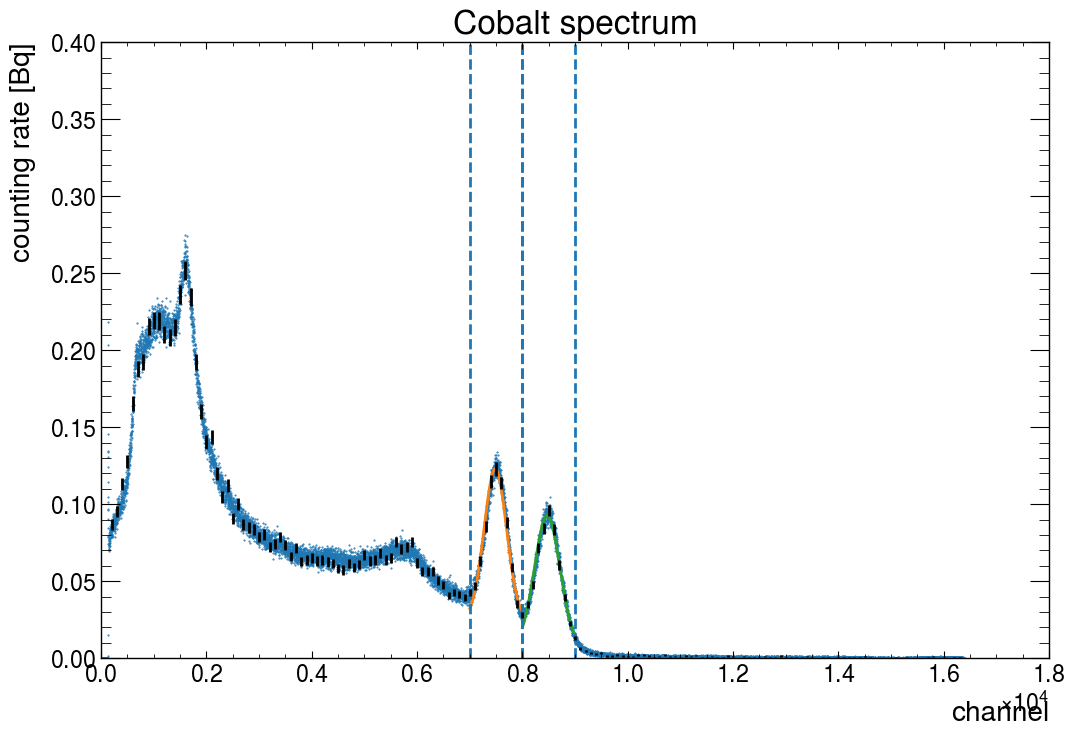

[9.79054557e-02 7.48503721e+03 2.11851545e+02 2.51781975e-02] [3.71742802e-04 5.21906836e-01 1.20317527e+00 3.84711422e-04]
[8.52933867e-02 8.46985374e+03 2.40302538e+02 7.36622550e-03] [3.87225700e-04 5.35970398e-01 1.52345225e+00 4.28354142e-04]


In [8]:
# Analysis of the Cobalt spectrum
channels = np.arange(1, len(N_Co)+1, 1)
a1, b1 = 7000, 8000
a2, b2 = 8000, 9000

coeffs_Co1, cov_Co1 = sc.curve_fit(gauss, channels[a1:b1], n_Co[a1:b1],
                                   sigma=u_Co[a1:b1], absolute_sigma=True,
                                   p0=(0.2, 7500, 200, 15))
coeffs_Co2, cov_Co2 = sc.curve_fit(gauss, channels[a2:b2], n_Co[a2:b2],
                                   sigma=u_Co[a2:b2], absolute_sigma=True,
                                   p0=(0.2, 8600, 200, 20))

fig, ax = plt.subplots(figsize=(12,8))

error_step = 100
ax.errorbar(channels[0:-1:error_step], n_Co[0:-1:error_step],
            yerr=u_Co[0:-1:error_step],
            fmt='none', c='black', zorder=10)

ax.plot(channels, n_Co, lw=0, marker = '.', ms = 1)
ax.plot(channels[a1:b1], gauss(channels[a1:b1], *coeffs_Co1))
ax.plot(channels[a2:b2], gauss(channels[a2:b2], *coeffs_Co2))
ax.axvline(channels[a1], ls = '--')
ax.axvline(channels[b1], ls = '--')
ax.axvline(channels[a2], ls = '--')
ax.axvline(channels[b2], ls = '--')

ax.set_ylim((0, 0.4))

ax.set_title('Cobalt spectrum')
ax.set_xlabel('channel')
ax.set_ylabel('counting rate [Bq]')

plt.show()
print(coeffs_Co1, np.sqrt(np.diagonal(cov_Co1)))
print(coeffs_Co2, np.sqrt(np.diagonal(cov_Co2)))

In [9]:
energies = np.array([511, 1274.6, 1173.2, 1332.5])
ch_num = np.array([coeffs_Na1[1], coeffs_Na2[1], coeffs_Co1[1], coeffs_Co2[1]])

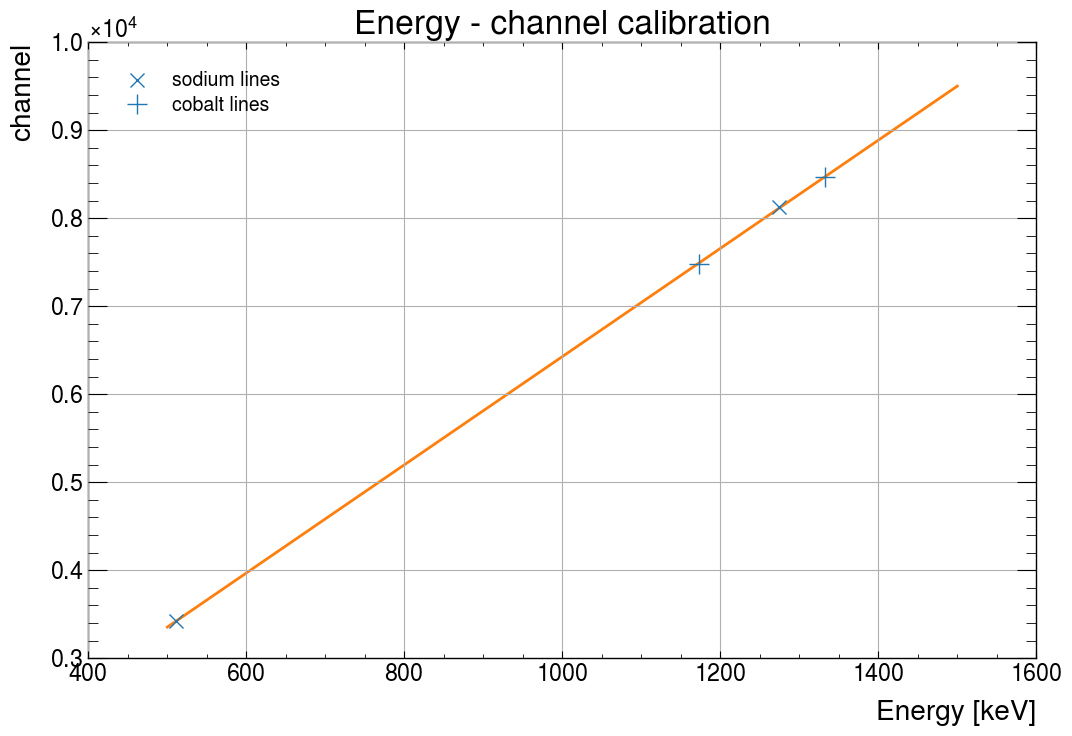

In [10]:
coeffs_lin, cov_lin = sc.curve_fit(linear_fct, energies, ch_num)

e_axis = np.linspace(500, 1500, 1001)

fig, ax = plt.subplots(figsize=(12,8))

ax.plot(e_axis, linear_fct(e_axis, *coeffs_lin), c='C1')
ax.plot(energies[:2], ch_num[:2], marker = 'x', ms=10, lw = 0, label = 'sodium lines', c='C0')
ax.plot(energies[2:], ch_num[2:], marker = '+', ms=14, lw = 0, label = 'cobalt lines', c='C0')

ax.set_title('Energy - channel calibration')
ax.set_xlabel('Energy [keV]')
ax.set_ylabel('channel')
ax.legend()
ax.grid()
plt.show()

In [11]:
def energy(channel):
    m, c = coeffs_lin
    return (channel - c) / m


def u_energy(channel, u_channel=1):
    m, c = coeffs_lin
    u_m, u_c = np.sqrt(np.diagonal(cov_lin))
    return np.sqrt((u_channel/m)**2 + (u_c/m)**2 + (u_m*(channel-c)/m**2)**2)

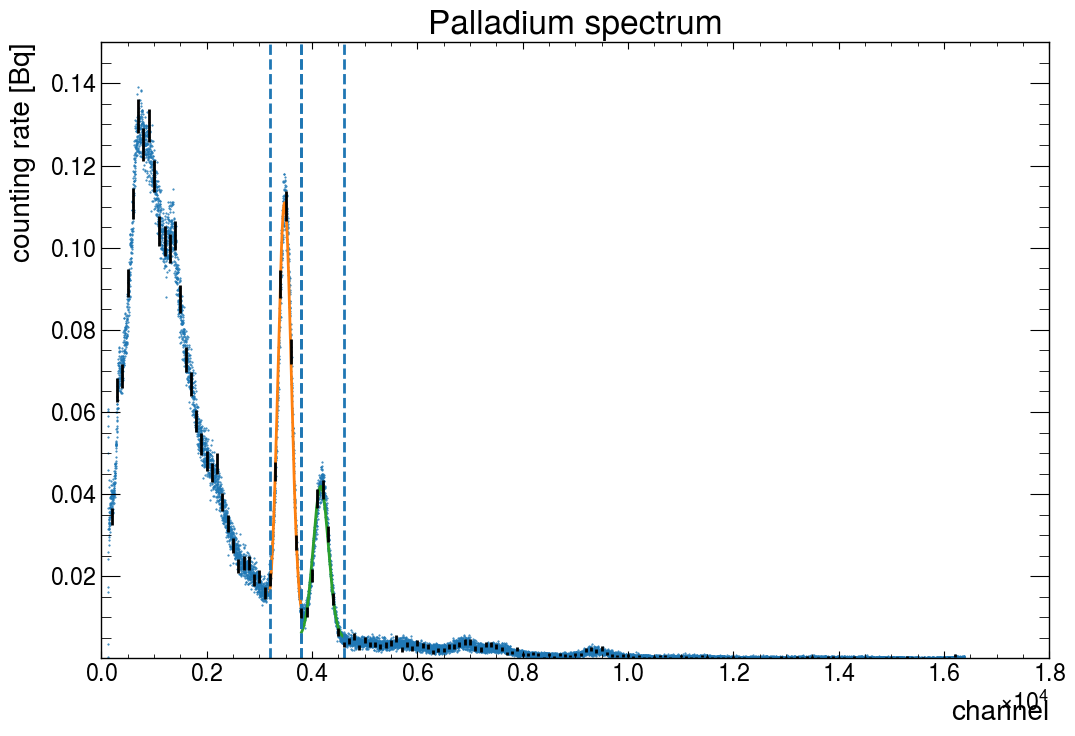

[1.02966541e-01 3.48019899e+03 1.24598318e+02 7.98647727e-03] [3.34679659e-04 3.05099378e-01 5.99692000e-01 2.98816396e-04]
[3.70099240e-02 4.16728962e+03 1.44250090e+02 4.89924414e-03] [1.69785428e-04 5.71527180e-01 8.58654902e-01 1.06400447e-04]


In [12]:
# Analysis of the Palladium spectrum
channels = np.arange(1, len(N_Pd)+1, 1)
a1, b1 = 3200, 3800
a2, b2 = 3800, 4600

coeffs_Pd1, cov_Pd1 = sc.curve_fit(gauss, channels[a1:b1], n_Pd[a1:b1],
                                   sigma=u_Pd[a1:b1], absolute_sigma=True,
                                   p0=(0.2, 3500, 200, 15))
coeffs_Pd2, cov_Pd2 = sc.curve_fit(gauss, channels[a2:b2], n_Pd[a2:b2],
                                   sigma=u_Pd[a2:b2], absolute_sigma=True,
                                   p0=(0.2, 4200, 200, 20))

fig, ax = plt.subplots(figsize=(12,8))

error_step = 100
ax.errorbar(channels[0:-1:error_step], n_Pd[0:-1:error_step],
            yerr=u_Pd[0:-1:error_step],
            fmt='none', c='black', zorder=10)

ax.plot(channels, n_Pd, lw=0, marker = '.', ms = 1)
ax.plot(channels[a1:b1], gauss(channels[a1:b1], *coeffs_Pd1))
ax.plot(channels[a2:b2], gauss(channels[a2:b2], *coeffs_Pd2))
ax.axvline(channels[a1], ls = '--')
ax.axvline(channels[b1], ls = '--')
ax.axvline(channels[a2], ls = '--')
ax.axvline(channels[b2], ls = '--')

ax.set_ylim((.5/t_Pd, 0.15))
#ax.set_yscale('log')

ax.set_title('Palladium spectrum')
ax.set_xlabel('channel')
ax.set_ylabel('counting rate [Bq]')

plt.show()
print(coeffs_Pd1, np.sqrt(np.diagonal(cov_Pd1)))
print(coeffs_Pd2, np.sqrt(np.diagonal(cov_Pd2)))

In [13]:
print(energy(3.48019899e+03), '+-', u_energy(3.48019899e+03), 'keV')
print(energy(4.16728962e+03), '+-', u_energy(4.16728962e+03), 'keV')

520.5239514862945 +- 2.6512688955977435 keV
632.2843242088691 +- 2.7602129114682357 keV


In [14]:
### Source for Pd Term sceme:
# Abb.2.11 on p. 38
# http://iktp.tu-dresden.de/IKTP/pub/09/Marcel_Heine_-_Eine_Suche_nach_Doppelbeta-Zerfaellen_von_Cadmium-_%20Zink_und%20Tellur-_Isotopen_mit_Positronen-Emission.pdf

# both lines identified! Nice!!

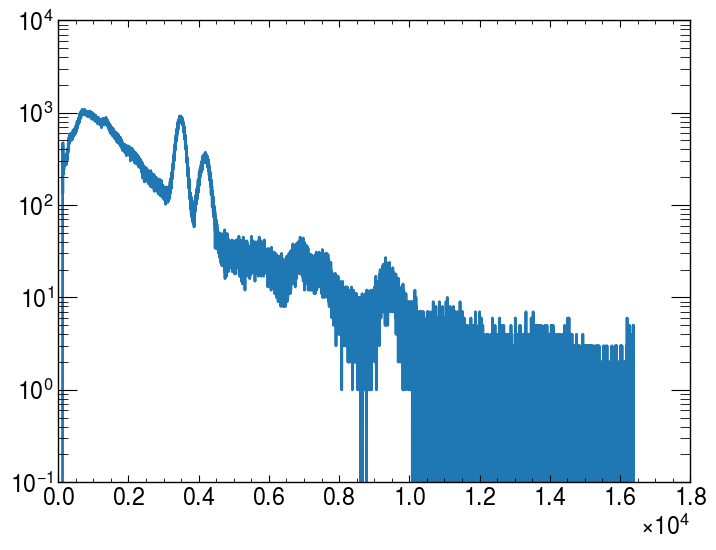

In [16]:
fig, ax = plt.subplots()

ax.plot(channels, N_Pd)
ax.set_yscale('log')